# Classical Methods

In [1]:
# imports
%matplotlib inline  
import numpy as np
import numpy.random as rng
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 

This exercise sheet is split in two parts where the first part is about regression and regularization and the second part is mainly about Linear Discriminant Analysis. 

## Regression and Regularization

Four different synthetic data sets are provided and your task is to implement different regression models. Please use the function stubs in the following three cells to implement 
    * Linear Regression
    * Polynomial Regression (Optional)
    * Ridge Regression

In [59]:
def computeCost(X, y, w):
    m = y.shape[0] # number of training examples

    h = X @ w
    J = np.sum((h-y)**2)/(2*m)

    return J

In [60]:
def gradientDescent(X, y, w, eta, num_iters):
    m = y.shape[0]  
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    w = w.copy()
    
    J_history = [] 
    
    for i in range(num_iters):
        h = X @ w
        w -= eta/m * X.T @ (h - y) 
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, w))
    
    return w, J_history

In [61]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X)
    sigma = np.std(X)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu, sigma

In [62]:
def linear_regression(X, y):
    # SOLUTION

    n = X.shape[1] 
    w = np.zeros((n,1))
    
    theta = np.zeros(2)

    # some gradient descent settings
    iterations = 1500
    eta = 0.01
    X_norm, mu, sigma = featureNormalize(X)
    
    w, J_history = gradientDescent(X_norm ,y, w, eta, iterations)

    return w
    # END SOLUTION

In [63]:
def polynomial_regression(X, y, m):
    # SOLUTION
    n = X.shape[1] 
    w = np.zeros((n,1))
    
    theta = np.zeros(2)

    # some gradient descent settings
    iterations = 1500
    eta = 0.01
    X_norm, mu, sigma = featureNormalize(X)
    
    w, J_history = gradientDescent(X_norm ,y, w, eta, iterations)

    y_hat = w @ X.T
    return y_hat.T 
    # END SOLUTION

In [64]:
def ridge_regression(X, y, m, lam):
    # SOLUTION
#     beta = inv(X.T @ X + lam*(np.identity(X.shape[0])))
#     c= X.T @ y
#     print(beta.shape, c.shape)
    # END SOLUTION

SyntaxError: unexpected EOF while parsing (<ipython-input-64-dca43fb49670>, line 6)

In [65]:
#ridge_regression(X.T, y.T, 1, 1)

### Generate data sets

In [66]:
X1 = np.array(np.linspace(-3,3,100).reshape(1,100))
y1 = 3*X1 + 1*rng.randn(100)

X2 = np.array(np.linspace(-20,20, 500).reshape(1,500))
y2 = (5 * (X2)**2) + 200*np.sin(X2) + 100*rng.randn(500)

X3 = np.array(np.linspace(0,np.pi*4,200).reshape(1,200))
y3 = 10*np.sin(X3) + 5*rng.randn(200) + 3*X3

X4 = np.linspace(0,4,200).reshape(1,200)
y4 = -30*X4 + 5*rng.randn(200)

num_outlier = 30
outlier4 = np.linspace(4,4.2, num_outlier).reshape(1,num_outlier)
X4 = np.hstack([X4, outlier4])
y4 = np.hstack([y4, outlier4+ rng.randn(num_outlier)])

data_sets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

### Apply models

Please apply the linear regression model on all data sets in `data_sets` and visualize the results by
    * plot the data as points
    * plot the regressed line.     

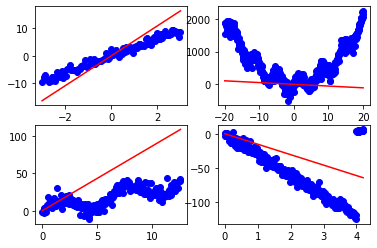

In [67]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

axes =[ax1, ax2, ax3, ax4]
                                         
for idata_set, data_set in enumerate(data_sets):
    X,y = data_set
    # YOUR CODE HERE
    w = linear_regression(X.T,y.T)
    y_hat = w * X.T
    # END YOUR CODE
    axes[idata_set].plot(X.T, y.T, "o", c="b")
    axes[idata_set].plot(X.T, y_hat, c="r")



Please apply polynomial regression on the second data set with varying polynomial degree `D` and interpret the solution.

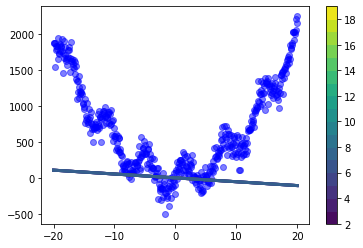

In [68]:
X,y = data_sets[1]
Ds = np.arange(2,20,1)
colors = plt.cm.viridis(Ds/(Ds.max()+1))

# YOUR CODE HERE
lines = []
for i in range(5):
    lines.append(polynomial_regression(X.T, y.T, i))
# END YOUR CODE

Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, Ds, cmap=plt.cm.viridis)
plt.clf()


    
plt.plot(X.T, y.T, "o", c="b", alpha=.5)
for iline,line in enumerate(lines):
    plt.plot(X.T, line, c=colors[iline], alpha=1, linewidth=3)

_ = plt.colorbar(CS3)

Please apply polynomial ridge regression on the third data set with varying $\lambda$ and interpret the solution.

ValueError: x and y must have same first dimension, but have shapes (200, 1) and (2, 1)

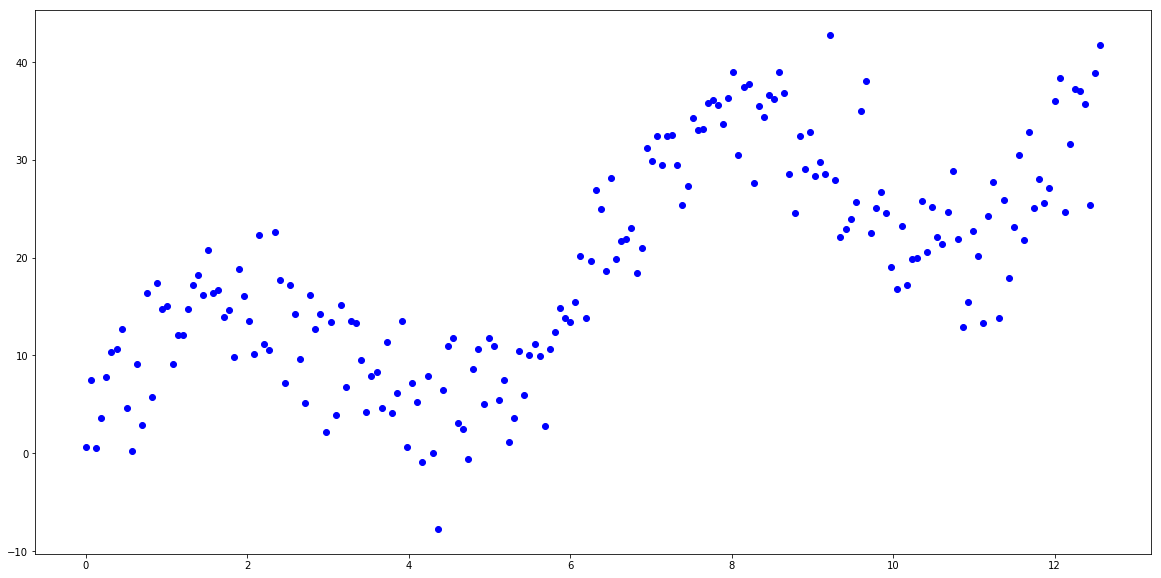

In [114]:
import matplotlib.colors as clr
D = 7


X,y = data_sets[2]
lams = np.arange(0, 100, .5)

colors = plt.cm.viridis(lams/100)

# YOUR CODE
lines = []
for i in range(100):
    lines.append(ridge_regression(X.T, y.T, 1, i))
# END 


Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, lams, cmap=plt.cm.viridis)
plt.clf()


    
plt.plot(X.T, y.T, "o", c="b")
for iline,line in enumerate(lines):
    plt.plot(X.T, line, c=colors[iline], alpha=.5)

_ = plt.colorbar(CS3)